<a href="https://colab.research.google.com/github/Sean-Reinhardt/Reinhardt-Sean/blob/main/CodingTask1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Science Fundamentals for DCBP, S. Haug, University of Bern 

# Coding Task 1

- Deadline (upload to Ilias): 2022-03-22 17:00
- Estimated effort: 2-5 hours (if you don't progress after 2 hours of trying, search for help, ChatGPT, Google, colleagues, course tutor)
- Data on Ilias: CCD-Data with metadata file CCD-Metadata


## Tasks (maximum 12.5 points)

- **CT-1.1** Write a method (function) which removes the header information in the 
datafile and saves that information into a separate textfile. [0.5 points] 
- **CT-1.2** Write a function which reduces the data resolution by merging/averaging columns such that there is only one column per 1 nm. [2.0 points]  
- **CT-1.3** Now generalize the above merging so that it works for any number nm er column. [2.0 points]
- **CT-1.4** Implement the saving of the reduced dataset to a file. Do this (1) by writing an explicit loop (write line by line) and (2) by using pandas methods. Measure the running times of the two approaches. [2.0 points]
- **CT-1.5** Write a function which takes two wavelengths as input and plots the difference of the data at these lengths over time. [2.0 points] 
- **CT-1.6** Let the x-axis be in seconds, label the axes with names and units, label the plot with color and legend, make a title for the plot. Save the plot to a file. [2.0 points]
- **CT-1.7** Plot the full and some reduced datasets in the same figure. Is there any visual difference? [2.0 points]

In [35]:
#Ct-1.4.without loop
%%timeit
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/datascience/1.4CCD-Data.txt'

df = pd.read_csv(path, delimiter='\t', header=13)
df = df.iloc[:,2:]

merged_df = df.groupby(np.arange(len(df.columns)) // 100, axis=1).mean()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/conte

In [36]:
#Ct-1.4 with loop
%%timeit
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/datascience/1.4CCD-Data.txt'

df = pd.read_csv(path, delimiter='\t', header=13)
df = df.iloc[:,2:]

merged_columns = [df.iloc[:, i:i+100].mean(axis=1) for i in range(0, len(df.columns), 100)]

merged_df = pd.concat(merged_columns, axis=1)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/conte

In [3]:
#Ct-1.3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/datascience/1.3CCD-Data.txt'

df = pd.read_csv(path, delimiter='\t', header=13, usecols=tuple(range(1,3648)))
df = df.iloc[:,]
def merge_nm(dataframe,y):
  range = y
  dataframe.columns = dataframe.columns.str.replace(r'(\d+\.\d+)', lambda x: str(range * round(float(x.group())/range)) if x.group() in dataframe else x.group())
  grouped = dataframe.groupby(dataframe.columns, axis=1).mean()
  return grouped

print(merge_nm(df,10))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
          320       330       340       350       360       370       380  \
0    0.000439  0.045837  0.058022  0.190212  0.335453  0.313744  0.419237   
1    0.338387 -0.013348  0.187475  0.589657  0.440922  0.431555  0.466150   
2   -0.063978  0.064275  0.140733  0.275776  0.426530  0.407223  0.463081   
3    0.050078  0.047621  0.042353  0.239687  0.334013  0.338644  0.418989   
4   -0.008990  0.057733  0.145002  0.171267  0.324252  0.306096  0.396790   
..        ...       ...       ...       ...       ...       ...       ...   
350  0.201993  0.213890  0.067827  0.229073  0.222014  0.200418  0.272377   
351 -0.012662  0.007244  0.139565  0.214443  0.207366  0.184703  0.258624   
352  0.050044  0.025452  0.064109  0.170277  0.286389  0.216768  0.281078   
353  0.067048  0.038397  0.166301  0.252820  0.249971  0.211990  0.269056   
354  0.036628  0.064017 

<ipython-input-3-a578b64dae62>:13: FutureWarning: The default value of regex will change from True to False in a future version.
  dataframe.columns = dataframe.columns.str.replace(r'(\d+\.\d+)', lambda x: str(range * round(float(x.group())/range)) if x.group() in dataframe else x.group())


In [4]:
#CT-1.2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/datascience/1.2CCD-Data.txt'

df = pd.read_csv(path, delimiter='\t', header=13, usecols=tuple(range(2,3650)))
def merge_nm(dataframe):
  dataframe.columns = dataframe.columns.str.replace(r'\d+\.\d+', lambda x: str(round(float(x.group()), 0)))
  grouped = df.groupby(dataframe.columns, axis=1).mean()
  return grouped

print(merge_nm(df))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
        317.0     318.0     319.0     320.0     321.0     322.0     323.0  \
0   -0.307607  0.250246  0.047105  0.079881 -0.020782 -0.010469  0.008056   
1   -0.474918 -0.113307  1.901428 -0.627869  0.050342  0.114170  1.951794   
2   -0.013433  0.016759  0.177034 -0.455033  0.080124  0.096211 -0.059139   
3   -0.104049  0.106396  0.105880 -0.137668 -0.048141  0.185273  0.167843   
4   -0.192761  0.088411 -0.046431 -0.049317 -0.008118  0.290382 -0.061686   
..        ...       ...       ...       ...       ...       ...       ...   
350 -0.516374 -0.033009  1.682252 -0.127398  0.054099  0.264018  0.131293   
351 -0.109420  0.099733  0.045232 -0.470515  0.035959  0.107200  0.184158   
352 -0.148134  0.314751  0.053684 -0.160693 -0.084396  0.285520  0.024156   
353 -0.191156 -0.115295  0.272780 -0.189450  0.274417  0.323621  0.111095   
354 -0.018664 -0.033945 

<ipython-input-4-6db981a16f82>:11: FutureWarning: The default value of regex will change from True to False in a future version.
  dataframe.columns = dataframe.columns.str.replace(r'\d+\.\d+', lambda x: str(round(float(x.group()), 0)))


In [ ]:
#CT-1.1
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/datascience/CCD-Data.txt'

with open(path, 'r') as instream:
  textlines = instream.readlines()

with open("newfile.txt", 'w') as f:

  for i in range(14):
    f.write(textlines[i])

with open("newfile.txt", 'r') as h:
  for line in h:
    print(line)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data from 4ms_10 av_15 s_Absorbance_10-32-04-868.txt Node



Date: Thu Oct 25 10:32:04 CEST 2018

User: Christoph

Spectrometer: BALLMOOS

Trigger mode: 4

Integration Time (sec): 4.000000E-3

Scans to average: 10

Electric dark correction enabled: true

Nonlinearity correction enabled: false

Boxcar width: 0

XAxis mode: Wavelengths

Number of Pixels in Spectrum: 3648

>>>>>Begin Spectral Data<<<<<



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


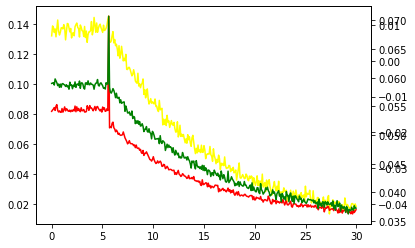

In [ ]:
#1.7
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/datascience/CCD-Data.txt'

df = pd.read_csv(path, delimiter='\t', header=13)

data = df.to_numpy()
time_sec = (data[:, 1]-1540456324789)/1000
average = np.mean(data[:, 1000:2000], axis=1)

fig, ax1 = plt.subplots()
ax1.plot(time_sec, data[:,1000], color='yellow')

ax2 = ax1.twinx()
ax2.plot(time_sec, average, color='red')

ax3 = ax1.twinx()
ax3.plot(time_sec, data[:, 2000], color ='green')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


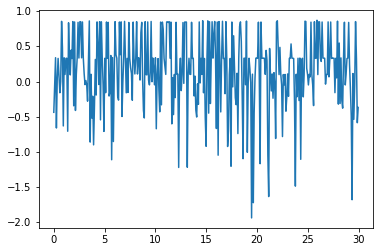

In [16]:
#CT-1.5
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
drive.mount('/content/drive')
path = '/content/drive/MyDrive/datascience/1.5CCD-Data.txt'

df = pd.read_csv(path, delimiter='\t', header=13)

df['Unnamed: 1'] = (df['Unnamed: 1'] - 1540456324789)/1000
x_axis = df['Unnamed: 1']

def plot_difference(data, a, b):
  difference = data[a]-data[b]

  fig, ax = plt.subplots()
  ax.plot(x_axis, difference)

plot_difference(df,'316.7492','322.1663')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

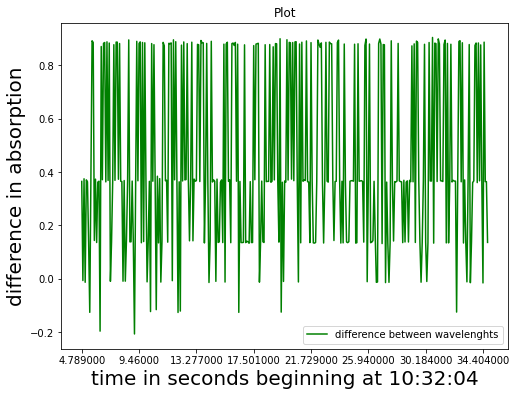

In [ ]:
#CT-1.6
import pandas as pd
from google.colab import drive
from google.colab import files
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
drive.mount('/content/drive')
path = '/content/drive/MyDrive/datascience/CCD-Data.txt'

df = pd.read_csv(path, delimiter='\t', header=13)

df['Unnamed: 0'] = pd.to_datetime(df['Unnamed: 0'])
df['seconds'] = df['Unnamed: 0'].dt.time.apply(lambda t: f"{t.second}.{t.microsecond}")

def plot_difference(data, colm, coln, x):
  a_val = data[colm]
  b_val = data[coln]
  x_val = data[x]
  difference = a_val - b_val

  fig, ax = plt.subplots(figsize=(8,6))
  ax.plot(x_val, difference, label='difference between wavelenghts', color='green')
  ax.set_xlabel('time in seconds beginning at 10:32:04', fontsize=20,)
  ax.set_ylabel('difference in absorption', fontsize=20)
  ax.legend()
  ax.set_title('Plot')
  ax.xaxis.set_major_locator(ticker.AutoLocator())
  

plot_difference(df,'316.6137','780.0381','seconds')

plt.savefig('difference_plot_CT1.png', bbox_inches='tight')
files.download('difference_plot_CT1.png')
